### <center>Friesky Astria Dewi Lestari</center>
#### <center>F1D022045</center>

In [164]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

# IMPORT GAMBAR

In [165]:
image = plt.imread("./assets/manchester_united.jpeg")
gray = cv.cvtColor(image,cv.COLOR_BGR2GRAY)
gray = np.pad(gray,1)
height, width = gray.shape
result = np.zeros((height, width), dtype=np.uint8)

Kode berikut melakukan beberapa tahap pemrosesan terhadap gambar Manchester United. Pertama, gambar dimuat dan dikonversi menjadi citra skala keabuan (grayscale), membuatnya lebih mudah untuk diproses. Selanjutnya, dilakukan penambahan border kosong di sekeliling gambar, yang diperlukan untuk beberapa operasi selanjutnya. Terakhir, sebuah matriks kosong dibuat dengan ukuran yang sama dengan gambar untuk menyimpan hasil pemrosesan. Dengan demikian, kode ini adalah langkah awal untuk melakukan berbagai manipulasi atau analisis lebih lanjut terhadap gambar tersebut.

# MEAN

In [166]:
def mean(gray,kernel):
    for i in range(kernel.shape[0]//2, height-kernel.shape[0]//2):
        for j in range(kernel.shape[1]//2, width-kernel.shape[1]//2):
            temp = gray[i - kernel.shape[0]//2:i + kernel.shape[0]//2 + 1, j - kernel.shape[0]//2:j + kernel.shape[0]//2 + 1]
            
            sum = 0
            for k in range(kernel.shape[0]):
                for l in range(kernel.shape[1]):
                    sum += kernel[k, l] * temp[k, l]
            result[i, j] = sum
    return result

Kode ini adalah sebuah fungsi untuk menghitung rata-rata dari citra grayscale menggunakan sebuah kernel tertentu. Kernel adalah matriks kecil yang digunakan untuk mengubah nilai piksel dalam citra. Fungsi ini menerima dua parameter, `gray` yang merupakan citra grayscale dan `kernel` yang merupakan matriks kernel.
Fungsi ini melakukan perulangan dua kali, pertama untuk setiap baris dan kedua untuk setiap kolom dalam citra. Pada setiap iterasi, fungsi mengambil bagian kecil dari citra (seukuran kernel) di sekitar piksel yang sedang diproses.
Kemudian, fungsi melakukan perulangan lagi untuk setiap elemen dalam kernel. Pada setiap langkah ini, nilai dari kernel dikalikan dengan nilai yang sesuai dari bagian citra yang diambil sebelumnya, dan hasilnya ditambahkan ke variabel `sum`.
Setelah semua elemen dalam kernel telah dikalikan dan ditambahkan, hasilnya disimpan dalam sebuah matriks bernama `result`. Matriks `result` berukuran sama dengan citra grayscale yang diproses.
Akhirnya, matriks `result` yang telah diisi dengan hasil perhitungan rata-rata dari citra grayscale menggunakan kernel tersebut, dikembalikan oleh fungsi.
Jadi, secara singkat, fungsi ini mengambil citra grayscale dan kernel, lalu menghitung rata-rata dari citra grayscale menggunakan kernel tersebut, dan mengembalikan hasilnya.

# MODUS

In [167]:
def modus(gray,kernel):
    for i in range(kernel.shape[0]//2, height-kernel.shape[0]//2):
        for j in range(kernel.shape[1]//2, width-kernel.shape[1]//2):
            temp = []
            for k in range(-kernel.shape[0]//2, kernel.shape[0]//2+1):
                for l in range(-kernel.shape[1]//2, kernel.shape[1]//2+1):
                    temp+=[gray[i+k][j+l]]
                    
            counts = np.zeros(256)
            for value in temp:
                counts[value] += 1
            max_count = -1
            max_value = -1
            
            for value in range(256):
                count = counts[value]
                if count > max_count:
                    max_count = count
                    max_value = value
            result[i][j] = max_value
    return result

Fungsi `modus` mengoperasikan citra keabuan dengan menggunakan sebuah kernel untuk menemukan modus (nilai paling sering muncul) di sekitar setiap piksel, dan kemudian menyimpan nilai modus tersebut ke dalam citra hasil. Dalam setiap iterasi, fungsi tersebut melintasi setiap piksel dalam citra, kecuali pinggiran, dan membentuk sebuah array sementara yang berisi nilai-nilai piksel dalam jangkauan kernel. Setelah itu, frekuensi kemunculan masing-masing nilai dalam array tersebut dihitung, dan nilai yang paling sering muncul ditentukan sebagai modus. Proses ini diulangi untuk setiap piksel dalam citra, dan hasilnya disimpan dalam sebuah array yang disebut `result`. Namun, beberapa variabel seperti `height`, `width`, dan `result` harus didefinisikan sebelumnya untuk menjalankan kode ini.

# MEDIAN

In [168]:
def median(gray, kernel):
    height, width = gray.shape
    result = np.zeros((height, width), dtype=np.uint8)

    kernelHeight, kernelWidth = kernel.shape
    kernelRadius = kernelHeight // 2

    for i in range(kernelRadius, height - kernelRadius):
        for j in range(kernelRadius, width - kernelRadius):
            temp = []
            for k in range(-kernelRadius, kernelRadius + 1):
                for l in range(-kernelRadius, kernelRadius + 1):
                    temp.append(gray[i + k, j + l])

            temp.sort()
            mid = len(temp) // 2
            median = temp[mid] if len(temp) % 2 != 0 else (temp[mid - 1] + temp[mid]) // 2
            result[i, j] = median
    return result


Fungsi ini adalah untuk menghitung nilai median dari citra grayscale (`gray`) dengan menggunakan sebuah kernel yang diberikan (`kernel`). Kernel ini digunakan untuk mengambil nilai-nilai piksel di sekitar titik yang sedang diproses dalam citra. Algoritma ini bekerja dengan cara mengambil nilai-nilai piksel dari area yang ditentukan oleh kernel, mengurutkannya, lalu mencari nilai tengahnya. Jika jumlah nilai ganjil, maka nilai tengah itu langsung diambil sebagai median. Namun, jika jumlahnya genap, maka nilai tengah dihitung sebagai rata-rata dari dua nilai tengah terdekat. Proses ini diulang untuk setiap titik dalam citra, kecuali untuk tepi yang terpengaruh oleh ukuran kernel. Hasilnya adalah citra baru dengan nilai-nilai median dari setiap bagian citra. Proses ini umumnya digunakan dalam pemrosesan citra untuk mengurangi noise atau gangguan dan mempertahankan detail dalam citra.

# 3X3

In [169]:
kernel3X3 = np.ones((3, 3), np.float32) / 9

Kode ini membuat sebuah kernel 3x3, yang dapat digunakan dalam berbagai pengolahan citra. Kernel ini berisi nilai 1dalam setiap sel dan dibagi dengan jumlah total sel, dalam hal ini 9, sehingga setiap nilai di kernel menjadi 1/9. Inibiasanya digunakan dalam proses penghalusan (smoothing) atau dalam teknik-teknik pemrosesan citra lainnya. Jadi, secarasederhana, kode ini membuat matriks 3x3 di mana setiap nilai adalah 1/9.

# 9X9

In [170]:
kernel9X9 = np.ones((9, 9), np.float32) / 81

kode ini membuat sebuah kernel 9x9 yang digunakan untuk operasi pemrosesan citra. Kernel tersebut terdiri dari matriks 9x9 dengan nilai semua elemen setara dengan 1, kemudian dibagi dengan 81 untuk menjaga nilai-nilai dalam rentang yang sesuai. Kernel ini sering digunakan dalam proses seperti konvolusi dalam pengolahan citra, di mana nilai-nilai dalam kernel digunakan untuk menghitung nilai piksel baru dalam citra dengan cara tertentu.

# SHARPENING & SMOOTHING

In [171]:
def getPad(image, kernel):
    i = (kernel.shape[1]-1)//2
    j = (kernel.shape[0]-1)//2

    kiri = i
    kanan = (kernel.shape[1]-1)-i
    atas = j
    bawah = (kernel.shape[0]-1)-j
    result = np.pad(image,((atas, bawah), (kiri,kanan)), 'edge')
    return result

def konvolusi(image, kernel):
    result = np.zeros(image.shape).astype(int)
    pad = getPad(image, kernel)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            sum = 0
            for k in range(kernel.shape[0]):
                for l in range(kernel.shape[1]):
                    sum+= pad[i+k][j+l] * kernel[k,l]
            result[i,j] = sum
    return result

Fungsi `getPad` bertujuan untuk menambahkan bingkai (padding) pada gambar menggunakan metode tepi yang dipilih, seperti "edge", sehingga kernel konvolusi dapat diterapkan pada seluruh area gambar tanpa kehilangan informasi di pinggiran. Pertama, fungsi menghitung jumlah baris dan kolom yang perlu ditambahkan untuk padding berdasarkan ukuran kernel. Kemudian, dengan menggunakan nilai yang dihitung, fungsi melakukan padding pada gambar input dan mengembalikan hasilnya.

Fungsi `konvolusi` digunakan untuk menerapkan operasi konvolusi antara gambar input dan kernel yang diberikan. Pertama, fungsi menginisialisasi matriks kosong yang akan menyimpan hasil konvolusi. Selanjutnya, fungsi menggunakan fungsi `getPad` untuk menambahkan padding pada gambar input. Selama iterasi melalui setiap piksel dalam gambar, fungsi melakukan iterasi melalui setiap elemen dalam kernel untuk menghitung konvolusi dengan mengalikan setiap elemen kernel dengan nilai piksel yang sesuai dalam gambar yang sudah dipad. Hasil dari perkalian tersebut kemudian dijumlahkan dan disimpan dalam matriks hasil. Fungsi ini mengembalikan gambar hasil setelah konvolusi selesai diaplikasikan.

In [172]:
smoothing = np.array([
    [1/10,1/10,1/10],
    [1/10,1/5,1/10],
    [1/10,1/10,1/10],
])

sharpening = np.array([
    [1/9,1/9,1/9],
    [1/9,8/9,1/9],
    [1/9,1/9,1/9],
])

semut = konvolusi(gray, smoothing)
hiu = konvolusi(gray, sharpening)

Kode ini menggunakan operasi matematis yang disebut konvolusi untuk memproses gambar abu-abu (gray) dengan dua jenis filter yang berbeda yaitu smoothing dan sharpening.
Filter smoothing (meratakan) digunakan untuk membuat gambar menjadi lebih lembut dengan mengurangi perbedaan antara nilai piksel yang berdekatan. Filter sharpening (pemulusan) digunakan untuk meningkatkan detail dan membuat gambar terlihat lebih tajam. Kedua filter tersebut direpresentasikan sebagai matriks, di mana setiap elemen matriks menentukan bobot atau kontribusi dari piksel yang berdekatan dalam perhitungan konvolusi. Setelah matriks filter didefinisikan, kedua filter tersebut diterapkan ke gambar abu-abu dengan menggunakan fungsi konvolusi, yang mengalikan matriks filter dengan bagian-bagian gambar dan menjumlahkan hasilnya. Hasil dari kedua proses konvolusi disimpan dalam variabel `semut` dan `hiu`. Variabel `gray` adalah gambar abu-abu yang ingin diproses. Jadi, secara keseluruhan, kode ini adalah tentang mengaplikasikan operasi konvolusi menggunakan filter smoothing dan sharpening ke gambar abu-abu untuk menciptakan efek yang berbeda.

# HASIL MEAN, MODUS, MEDIAN, SHARPENING, & SMOOTHING

Kode tersebut adalah visualisasi dari beberapa metode pemrosesan citra pada gambar abu-abu dengan ukuran 16x8 inci. Setiap metode, seperti mean, median, dan modus dengan kernel 3x3 serta 9x9, ditampilkan dalam subplot yang berbeda untuk membandingkan hasilnya. Selain itu, gambar yang di-sharpened dan di-smoothed juga disertakan. 

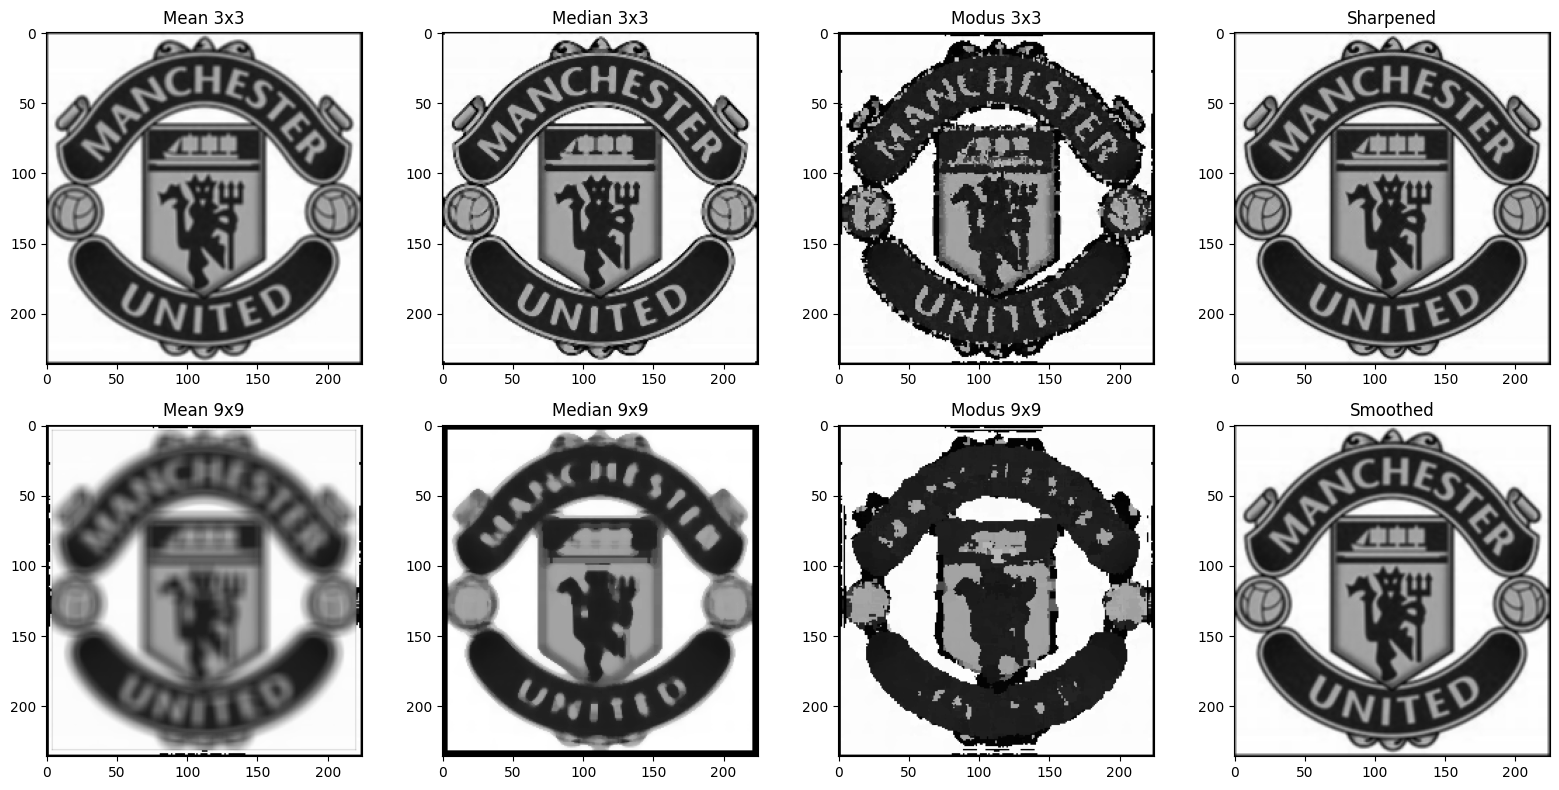

In [173]:
plt.figure(figsize=(16, 8))

plt.subplot(241), plt.imshow(mean(gray,kernel3X3),cmap='gray'), plt.title('Mean 3x3')
plt.subplot(242), plt.imshow(median(gray,kernel3X3),cmap='gray'), plt.title('Median 3x3')
plt.subplot(243), plt.imshow(modus(gray,kernel3X3),cmap='gray'), plt.title('Modus 3x3')

plt.subplot(245), plt.imshow(mean(gray,kernel9X9),cmap='gray'), plt.title('Mean 9x9')
plt.subplot(246), plt.imshow(median(gray,kernel9X9),cmap='gray'), plt.title('Median 9x9')
plt.subplot(247), plt.imshow(modus(gray,kernel9X9),cmap='gray'), plt.title('Modus 9x9')

plt.subplot(244), plt.imshow(hiu, cmap='gray'), plt.title('Sharpened')
plt.subplot(248), plt.imshow(semut, cmap='gray'), plt.title('Smoothed')

plt.tight_layout()
plt.show()

# DETEKSI TEPI

In [174]:
prewittX = np.array([
    [-1,0,1],
    [-1,0,1],
    [-1,0,1]
])

prewittY = np.array([
    [1,1,1],
    [0,0,0],
    [-1,-1,-1]
])

Kode tersebut merupakan implementasi filter Prewitt dalam pemrosesan citra. Filter Prewitt digunakan untuk mendeteksi tepi dalam citra dengan menghitung perbedaan intensitas piksel secara horizontal (prewittX) dan vertikal (prewittY). Filter prewittX bekerja dengan mengalikan piksel-piksel di sepanjang baris citra dengan matriks filter [-1, 0, 1] dan kemudian menjumlahkannya. Ini menghasilkan representasi citra dengan menyoroti perubahan intensitas horizontal. Sedangkan prewittY melakukan hal serupa untuk perubahan intensitas vertikal dengan matriks filter [1, 1, 1; 0, 0, 0; -1, -1, -1]. Penggunaan filter Prewitt dalam citra membantu menonjolkan tepi objek, yang penting dalam pengenalan objek dan analisis citra.

In [175]:
robertX = np.array([
    [1,0],
    [0,-1]
])

robertY = np.array([
    [0,1],
    [-1,0]
])

Kode di atas mendefinisikan dua matriks, robertX dan robertY, yang merupakan filter untuk deteksi tepi menggunakan metode Robert Cross. Filter Robert Cross digunakan dalam pemrosesan citra untuk menemukan tepi dalam gambar. Matriks robertX digunakan untuk mendeteksi tepi vertikal, sementara matriks robertY digunakan untuk mendeteksi tepi horizontal.

In [176]:
sobelX = np.array([
    [-1,0,1],
    [-2,0,2],
    [-1,0,1]
])

sobelY = np.array([
    [1,2,1],
    [0,0,0],
    [-1,-2,-1]
])

Kode di atas mendefinisikan dua filter, yaitu sobelX dan sobelY, yang digunakan dalam proses deteksi tepi pada gambar. Filter sobelX digunakan untuk mendeteksi tepi secara horizontal, sedangkan sobelY digunakan untuk mendeteksi tepi secara vertikal. Ketika filter diterapkan pada gambar, mereka berfungsi dengan melakukan konvolusi terhadap piksel-piksel dalam gambar, menghitung gradien intensitas pada setiap titik. Filter sobelX menyoroti perbedaan intensitas horizontal, sedangkan sobelY menyoroti perbedaan intensitas vertikal. Dengan menggunakan kedua filter ini secara bersamaan, kita dapat mengidentifikasi garis tepi dan kontur objek dalam gambar. 

In [177]:
def findEdge(image, kernelx, kernely):
    result = np.zeros(image.shape).astype(int)
    pad = getPad(image, kernelx)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            x = 0
            y = 0
            for k in range(kernelx.shape[0]):
                for l in range(kernelx.shape[1]):
                    x += pad[i+k][j+l] * kernelx[k,l]
                    y += pad[i+k][j+l] * kernely[k,l]

            result[i,j] = math.sqrt(x*x + y*y)
    return result

Fungsi `findEdge` adalah untuk menemukan tepi pada gambar menggunakan metode filterisasi dengan kernel yang diberikan. Pertama, fungsi ini membuat matriks nol yang ukurannya sama dengan gambar input. Kemudian, dilakukan proses iterasi melalui setiap piksel dalam gambar. Pada setiap piksel, dilakukan konvolusi dengan kernelx dan kernely secara terpisah untuk mendapatkan gradien horizontal (x) dan gradien vertikal (y). Nilai gradien ini kemudian digunakan untuk menghitung magnitude (akar kuadrat dari jumlah kuadrat dari kedua gradien) yang menunjukkan kekuatan perubahan intensitas. Hasil akhir dari proses ini adalah gambar yang menunjukkan intensitas tepi yang terdeteksi di setiap piksel.

In [178]:
mean3x3 = mean(gray,kernel3X3)
modus3x3 = modus(gray,kernel3X3)
median3x3 = median(gray,kernel3X3)

mean9x9 = mean(gray,kernel9X9)
median9x9 = median(gray,kernel9X9)
modus9x9 = modus(gray,kernel9X9)

Kode di atas mengenai pengolahan citra menggunakan teknik pemrosesan seperti mean (rata-rata), median (tengah), dan modus (nilai yang paling sering muncul). Pertama, citra diubah menjadi citra keabuan (grayscale) yang kemudian diproses menggunakan kernel 3x3 dan kernel 9x9. Kernel adalah matriks yang digunakan untuk melakukan operasi konvolusi pada citra. Dalam kasus ini, masing-masing operasi seperti mean, median, dan modus diterapkan dengan kernel 3x3 dan 9x9 pada citra keabuan. Ini berarti untuk setiap titik piksel di citra, nilai piksel tersebut dan nilai-niali tetangganya di sekitarnya (3x3 atau 9x9 tergantung pada kernel yang digunakan) digunakan untuk menghasilkan nilai baru sesuai dengan operasi yang dijalankan. Hasil dari operasi-operasi ini, yaitu mean, median, dan modus, disimpan dalam variabel masing-masing (mean3x3, median3x3, modus3x3, mean9x9, median9x9, dan modus9x9) untuk digunakan selanjutnya dalam analisis atau visualisasi lebih lanjut.

# MENAMPILKAN SOBEL

Kode berikut adalah bagian dari proses pemrosesan citra yang menggunakan metode Sobel untuk deteksi tepi. Pada awalnya, citra yang telah diolah dengan filter rata-rata (mean), filter median, dan filter modus dengan ukuran matriks tertentu (3x3 atau 9x9) disisipkan ke dalam fungsi `findEdge` bersama dengan kernel Sobel dalam arah horizontal dan vertikal, yaitu `sobelX` dan `sobelY`. Hasilnya adalah citra yang menunjukkan tepi-tepi dalam citra asli dengan metode deteksi Sobel untuk setiap jenis pengolahan citra tersebut. Selanjutnya, citra hasil dari setiap metode pengolahan ditampilkan menggunakan matplotlib dalam bentuk subplot dengan judul yang sesuai dengan jenis pengolahan yang dilakukan, seperti rata-rata (mean), median, dan modus, serta ukuran matriks yang digunakan. Selain itu, citra hasil sharpening dan smoothing juga ditampilkan pada subplot terakhir sebagai perbandingan.

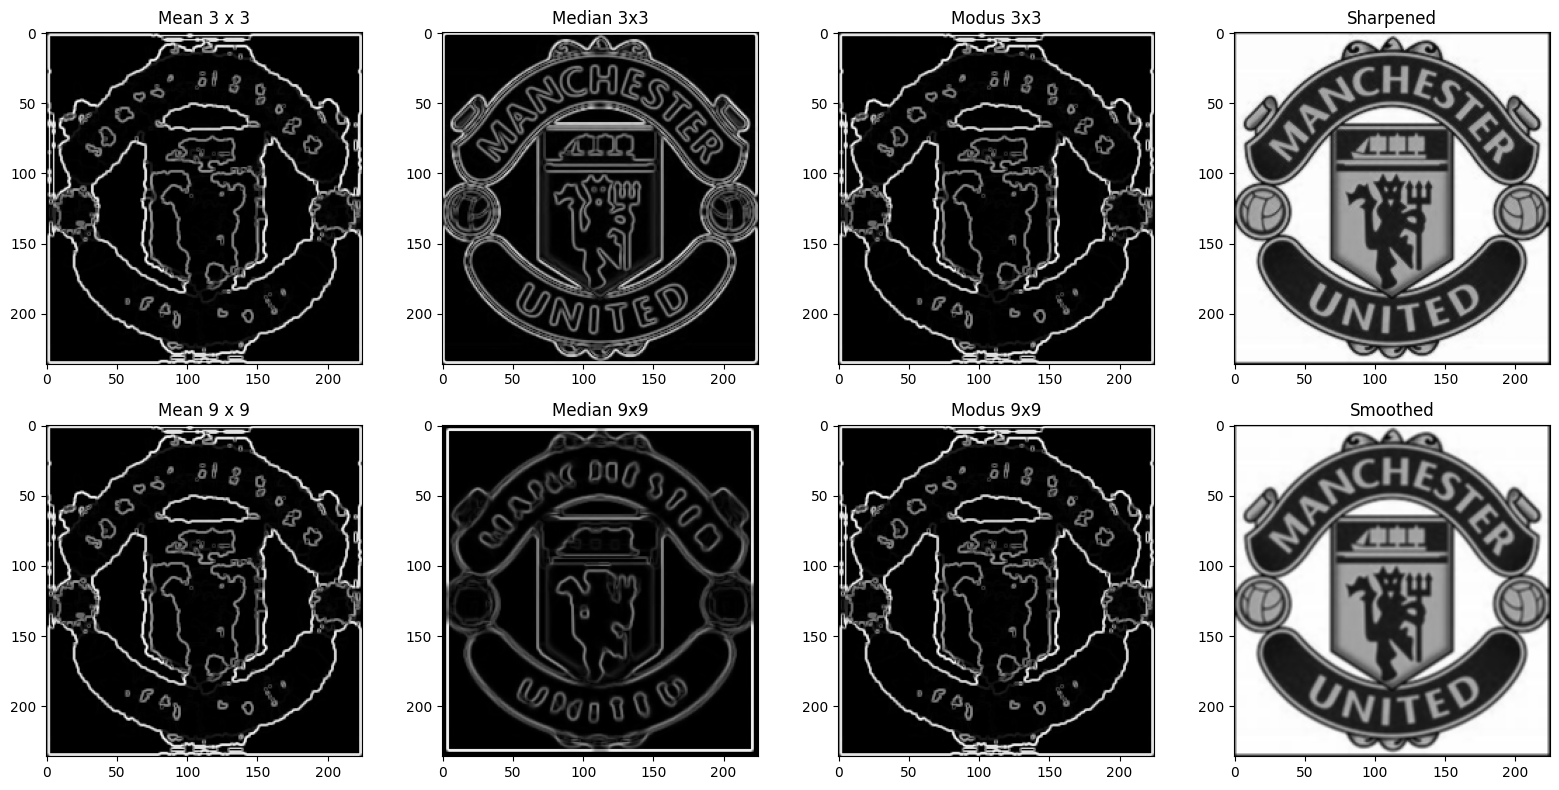

In [179]:
sobel_mean3 = findEdge(mean3x3,sobelX,sobelY)
sobel_median3 = findEdge(median3x3,sobelX,sobelY)
sobel_modus3 = findEdge(modus3x3,sobelX,sobelY)
sobel_mean9 = findEdge(mean9x9,sobelX,sobelY)
sobel_median9 = findEdge(median9x9,sobelX,sobelY)
sobel_modus9 = findEdge(modus9x9,sobelX,sobelY)
sobel_smooth = findEdge(semut,sobelX,sobelY)
sobel_sharp = findEdge(hiu,sobelX,sobelY)

plt.figure(figsize=(16, 8))

plt.subplot(241), plt.imshow(sobel_mean3,cmap='gray'), plt.title('Mean 3 x 3')
plt.subplot(242), plt.imshow(sobel_median3,cmap='gray'), plt.title('Median 3x3')
plt.subplot(243), plt.imshow(sobel_modus3,cmap='gray'), plt.title('Modus 3x3')

plt.subplot(245), plt.imshow(sobel_mean9,cmap='gray'), plt.title('Mean 9 x 9')
plt.subplot(246), plt.imshow(sobel_median9,cmap='gray'), plt.title('Median 9x9')
plt.subplot(247), plt.imshow(sobel_modus9,cmap='gray'), plt.title('Modus 9x9')

plt.subplot(244), plt.imshow(hiu, cmap='gray'), plt.title('Sharpened')
plt.subplot(248), plt.imshow(semut, cmap='gray'), plt.title('Smoothed')


plt.tight_layout()
plt.show()


# MENAMPILKAN PREWITT

Kode berikut adalah bagian dari proses pemrosesan citra yang menggunakan metode Prewitt untuk deteksi tepi. Pada awalnya, citra yang telah diolah dengan filter rata-rata (mean), filter median, dan filter modus dengan ukuran matriks tertentu (3x3 atau 9x9) disisipkan ke dalam fungsi `findEdge` bersama dengan kernel Sobel dalam arah horizontal dan vertikal, yaitu `prewittX` dan `prewittY`. Hasilnya adalah citra yang menunjukkan tepi-tepi dalam citra asli dengan metode deteksi Prewitt untuk setiap jenis pengolahan citra tersebut. Selanjutnya, citra hasil dari setiap metode pengolahan ditampilkan menggunakan matplotlib dalam bentuk subplot dengan judul yang sesuai dengan jenis pengolahan yang dilakukan, seperti rata-rata (mean), median, dan modus, serta ukuran matriks yang digunakan. Selain itu, citra hasil sharpening dan smoothing juga ditampilkan pada subplot terakhir sebagai perbandingan.

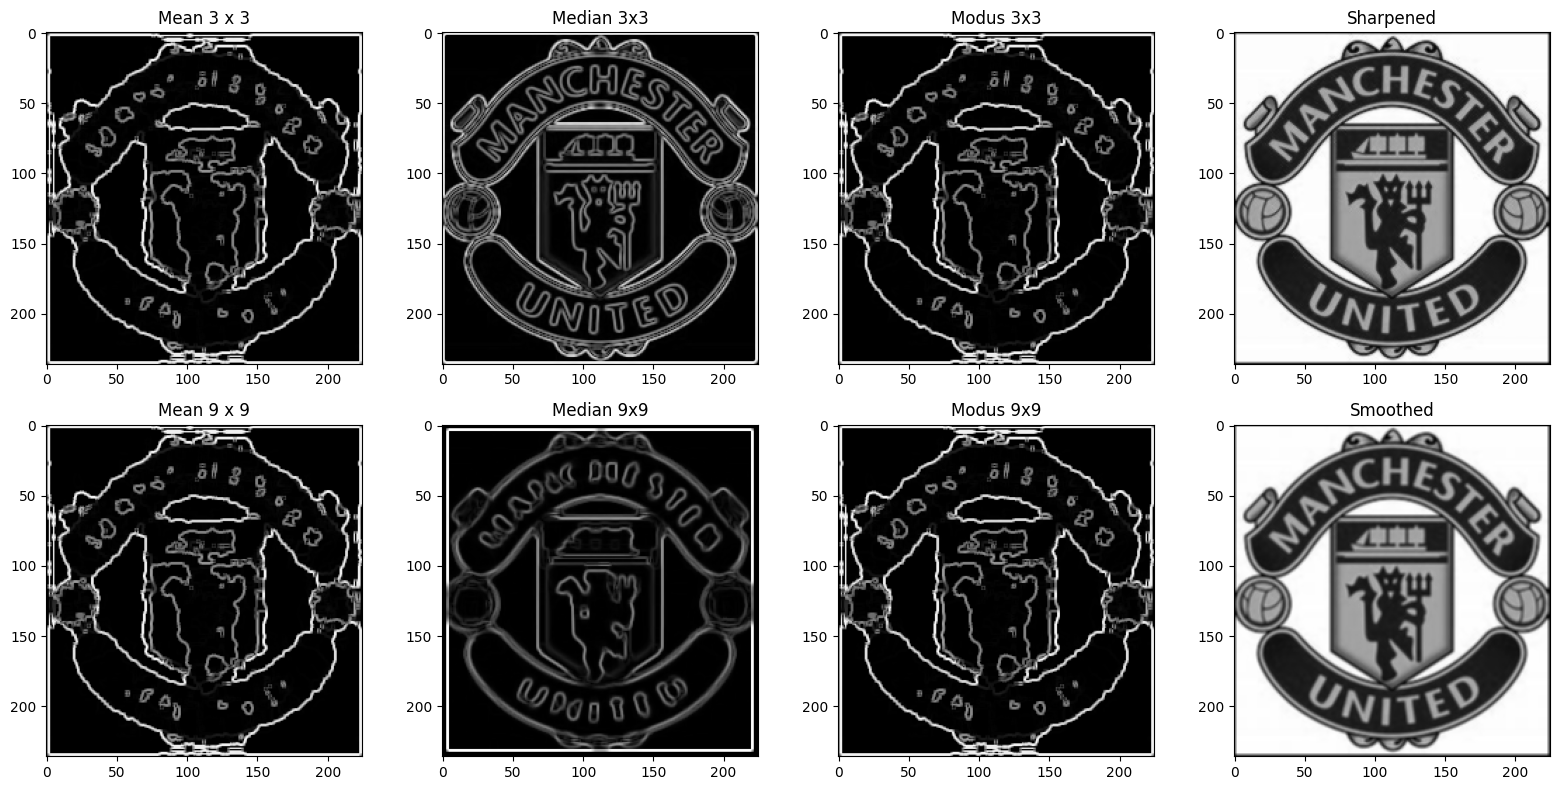

In [180]:
prewitt_mean3 = findEdge(mean3x3,prewittX,prewittY)
prewitt_median3 = findEdge(median3x3,prewittX,prewittY)
prewitt_modus3 = findEdge(modus3x3,prewittX,prewittY)
prewitt_mean9 = findEdge(mean9x9,prewittX,prewittY)
prewitt_median9 = findEdge(median9x9,prewittX,prewittY)
prewitt_modus9 = findEdge(modus9x9,prewittX,prewittY)
prewitt_smooth = findEdge(semut,prewittX,prewittY)
prewitt_sharp = findEdge(hiu,prewittX,prewittY)

plt.figure(figsize=(16, 8))

plt.subplot(241), plt.imshow(prewitt_mean3,cmap='gray'), plt.title('Mean 3 x 3')
plt.subplot(242), plt.imshow(prewitt_median3,cmap='gray'), plt.title('Median 3x3')
plt.subplot(243), plt.imshow(prewitt_modus3,cmap='gray'), plt.title('Modus 3x3')

plt.subplot(245), plt.imshow(prewitt_mean9,cmap='gray'), plt.title('Mean 9 x 9')
plt.subplot(246), plt.imshow(prewitt_median9,cmap='gray'), plt.title('Median 9x9')
plt.subplot(247), plt.imshow(prewitt_modus9,cmap='gray'), plt.title('Modus 9x9')

plt.subplot(244), plt.imshow(hiu, cmap='gray'), plt.title('Sharpened')
plt.subplot(248), plt.imshow(semut, cmap='gray'), plt.title('Smoothed')


plt.tight_layout()
plt.show()


# MENAMPILKAN ROBERT

Kode berikut adalah bagian dari proses pemrosesan citra yang menggunakan metode Robert untuk deteksi tepi. Pada awalnya, citra yang telah diolah dengan filter rata-rata (mean), filter median, dan filter modus dengan ukuran matriks tertentu (3x3 atau 9x9) disisipkan ke dalam fungsi `findEdge` bersama dengan kernel Sobel dalam arah horizontal dan vertikal, yaitu `robertX` dan `robertY`. Hasilnya adalah citra yang menunjukkan tepi-tepi dalam citra asli dengan metode deteksi Robert untuk setiap jenis pengolahan citra tersebut. Selanjutnya, citra hasil dari setiap metode pengolahan ditampilkan menggunakan matplotlib dalam bentuk subplot dengan judul yang sesuai dengan jenis pengolahan yang dilakukan, seperti rata-rata (mean), median, dan modus, serta ukuran matriks yang digunakan. Selain itu, citra hasil sharpening dan smoothing juga ditampilkan pada subplot terakhir sebagai perbandingan.

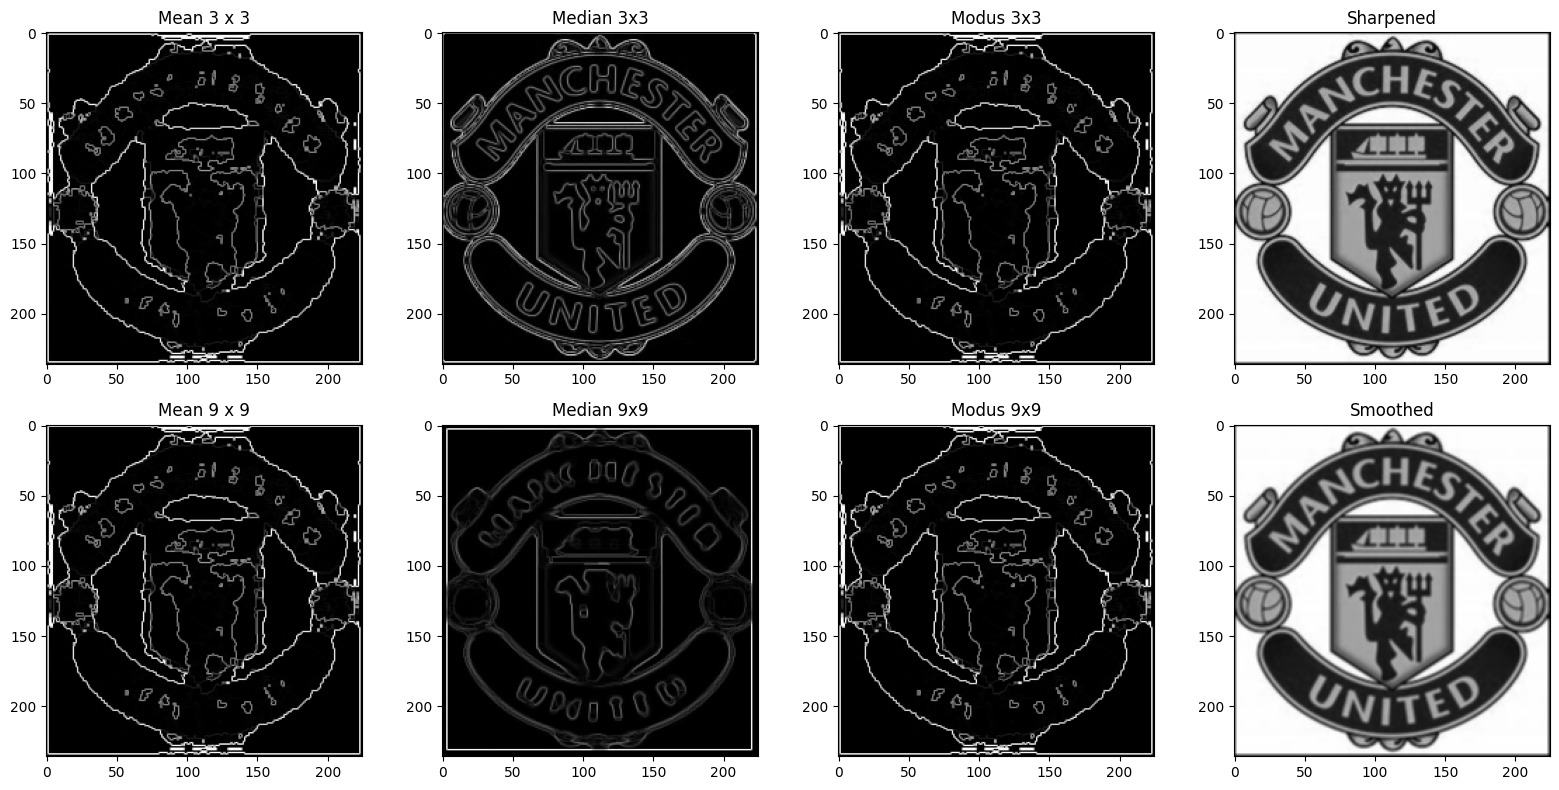

In [181]:
robert_mean3 = findEdge(mean3x3,robertX,robertY)
robert_median3 = findEdge(median3x3,robertX,robertY)
robert_modus3 = findEdge(modus3x3,robertX,robertY)
robert_mean9 = findEdge(mean9x9,robertX,robertY)
robert_median9 = findEdge(median9x9,robertX,robertY)
robert_modus9 = findEdge(modus9x9,robertX,robertY)
robert_smooth = findEdge(semut,robertX,robertY)
robert_sharp = findEdge(hiu,robertX,robertY)

plt.figure(figsize=(16, 8))

plt.subplot(241), plt.imshow(robert_mean3,cmap='gray'), plt.title('Mean 3 x 3')
plt.subplot(242), plt.imshow(robert_median3,cmap='gray'), plt.title('Median 3x3')
plt.subplot(243), plt.imshow(robert_modus3,cmap='gray'), plt.title('Modus 3x3')

plt.subplot(245), plt.imshow(robert_mean9,cmap='gray'), plt.title('Mean 9 x 9')
plt.subplot(246), plt.imshow(robert_median9,cmap='gray'), plt.title('Median 9x9')
plt.subplot(247), plt.imshow(robert_modus9,cmap='gray'), plt.title('Modus 9x9')

plt.subplot(244), plt.imshow(hiu, cmap='gray'), plt.title('Sharpened')
plt.subplot(248), plt.imshow(semut, cmap='gray'), plt.title('Smoothed')


plt.tight_layout()
plt.show()
